## Dataset
1). calender.csv : Contains information about the dates on which the products are sold. Maps the wallmart fiscal year (wm_yr_wk) to the date and the events at that time. wallmart fiscal year signifies the time at which an item was sold. 

2). sales_train_validation.csv : Contains the historical daily unit sales data per product and store [d_1 - d_1913]. d_x signifies the xth day in our time series dataset and not necessarily Jan 1. its mapped to wallmart wiscal year and actual date in calendar.csv.  

3). sell_prices.csv : Contains information about the price of the products sold per store and date.  

4). sales_train_evaluation.csv : Includes sales [d_1 - d_1941] (labels used for the Public leaderboard)

In [2]:
import pandas as pd
import numpy as np

In [3]:
## load dataset to df

calendar_df = pd.read_csv(r"E:\environments\wallmart\dataset\m5-forecasting-accuracy\calendar.csv")
sales_evaluation_df = pd.read_csv(r"E:\environments\wallmart\dataset\m5-forecasting-accuracy\sales_train_evaluation.csv")
sales_validation_df = pd.read_csv(r"E:\environments\wallmart\dataset\m5-forecasting-accuracy\sales_train_validation.csv")
sell_prices_df = pd.read_csv(r"E:\environments\wallmart\dataset\m5-forecasting-accuracy\sell_prices.csv")

In [4]:
dtypes = {col: 'float32' for col in sales_validation_df.columns if col.startswith('d_')}
sales_validation_df = pd.read_csv(r"E:\environments\wallmart\dataset\m5-forecasting-accuracy\sales_train_validation.csv", dtype=dtypes)

### Calendar.csv


In [5]:
print(calendar_df.shape)
calendar_df.head()

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [6]:
print(calendar_df.nunique())


date            1969
wm_yr_wk         282
weekday            7
wday               7
month             12
year               6
d               1969
event_name_1      30
event_type_1       4
event_name_2       4
event_type_2       2
snap_CA            2
snap_TX            2
snap_WI            2
dtype: int64


In [7]:
print(calendar_df.isnull().sum())

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64


### Sales_train_evaluation.csv

In [8]:
print(sales_evaluation_df.shape)
sales_evaluation_df.head()

(30490, 1947)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


### Sales_train_validation.csv

In [9]:
print(sales_validation_df.shape)
sales_validation_df.head()

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,3.0,7.0,2.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0


In [10]:
sales_validation_df.nunique()

id          30490
item_id      3049
dept_id         7
cat_id          3
store_id       10
            ...  
d_1909         53
d_1910         57
d_1911         61
d_1912         73
d_1913         65
Length: 1919, dtype: int64

In [11]:
sales_validation_df.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

### sell_prices.csv

In [12]:
print(sell_prices_df.shape)
sell_prices_df.head()

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [13]:
sell_prices_df.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

## EDA

In [ ]:
import matplotlib as plt
import seaborn as sns

In [14]:
# Filter sales columns

sales_cols = [c for c in sales_validation_df.columns if c.startswith('d_')]
id_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

In [18]:
# Total sales per item
sales_validation_df['total_sales'] = sales_validation_df[sales_cols].sum(axis=1)

# Top-selling items
top_items = sales_validation_df[['item_id', 'total_sales']].groupby('item_id').sum().sort_values(by='total_sales', ascending=False).head(10)

# Total sales per store
store_sales = sales_validation_df[['store_id', 'total_sales']].groupby('store_id').sum()

# Total sales per state
state_sales = sales_validation_df[['state_id', 'total_sales']].groupby('state_id').sum()

print(f'Top selling items: \n{top_items}')
print(f'Total sales per store \n{store_sales}')
print(f'Total sales per state: \n{state_sales}')

Top selling items: 
             total_sales
item_id                 
FOODS_3_090    1002529.0
FOODS_3_586     920242.0
FOODS_3_252     565299.0
FOODS_3_555     491287.0
FOODS_3_714     396172.0
FOODS_3_587     396119.0
FOODS_3_694     390001.0
FOODS_3_226     363082.0
FOODS_3_202     295689.0
FOODS_3_723     284333.0
Total sales per store 
          total_sales
store_id             
CA_1        7698216.0
CA_2        5685475.0
CA_3       11188180.0
CA_4        4103676.0
TX_1        5595292.0
TX_2        7214384.0
TX_3        6089330.0
WI_1        5149062.0
WI_2        6544012.0
WI_3        6427782.0
Total sales per state: 
          total_sales
state_id             
CA         28675548.0
TX         18899006.0
WI         18120856.0


FOODS_3_090 is the highest sold items  
store id 'CA_1' sold highest number of items  
state id 'CA' sold the highest number of items

<Axes: title={'center': 'Total Sales Over Time'}, xlabel='date'>

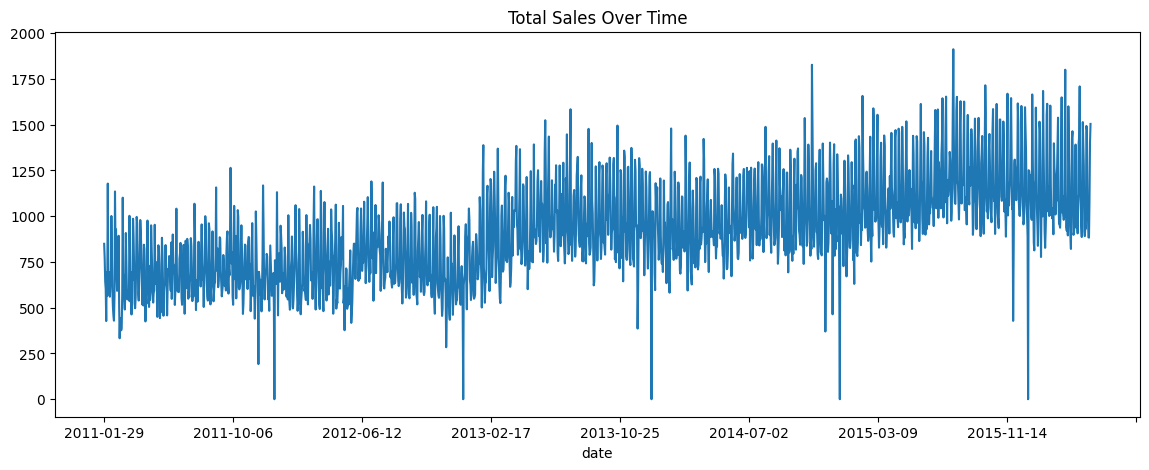

In [19]:
# taking subset to reduce memory while melting

subset = sales_validation_df.head(1000)  # or sample a few rows
melted = subset.melt(id_vars=id_cols, value_vars=sales_cols, var_name='d', value_name='sales')
melted = melted.merge(calendar_df[['d', 'date']], on='d', how='left')

# Plot sales trend over time

import matplotlib.pyplot as plt

daily_sales = melted.groupby('date')['sales'].sum()
daily_sales.plot(figsize=(14, 5), title='Total Sales Over Time')

Total sales reduces periodically over some time, indication a drastic effect of certain ocassions on sales 

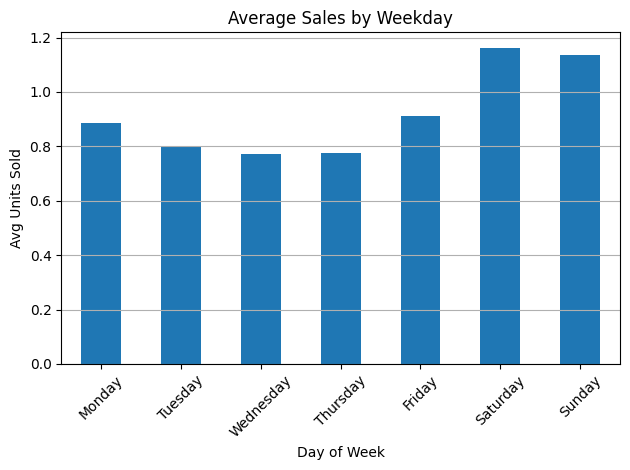

In [ ]:
## effect of weekdays on sales


melted = sales_validation_df.head(1000).melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    var_name='d',
    value_name='sales'
)

melted = melted.merge(calendar_df[['d', 'weekday']], on='d', how='left')

weekday_sales = melted.groupby('weekday')['sales'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Step 4: Plot
import matplotlib.pyplot as plt
weekday_sales.plot(kind='bar', title='Average Sales by Weekday', ylabel='Avg Units Sold', xlabel='Day of Week', rot=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Sundays seems to sell higher

In [ ]:
## effect of prices changes on sales of items

total_sales_per_item = melted.groupby('item_id')['sales'].sum().sort_values(ascending=False)

top_10_items = total_sales_per_item.head(10).index.tolist()

for item in top_10_items:
    item_df = melted[melted['item_id'] == item]

    item_df = item_df.merge(calendar_df[['d', 'wm_yr_wk']], on='d', how='left')

    item_df = item_df.merge(sell_prices_df, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')

    item_df = item_df.dropna(subset=['sell_price'])

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(item_df['sell_price'], item_df['sales'], alpha=0.3)
    plt.title(f'Sales vs Price for {item}')
    plt.xlabel('Sell Price')
    plt.ylabel('Units Sold')
    plt.grid(True)
    plt.show()


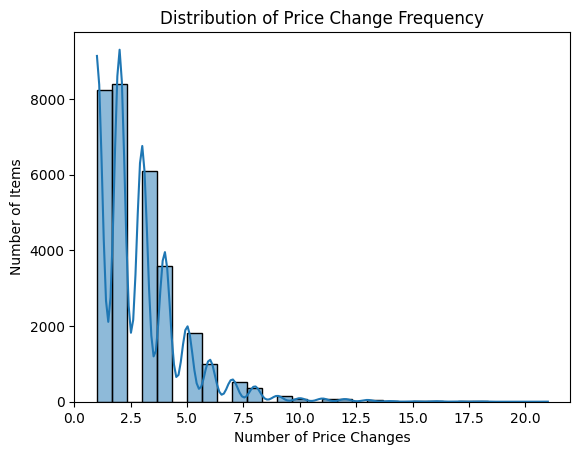

cat_id
FOODS        3.317049
HOBBIES      2.332566
HOUSEHOLD    2.253391
Name: num_price_changes, dtype: float64

In [ ]:
## frequency of price change over items

price_changes = sell_prices_df.groupby(['item_id', 'store_id'])['sell_price'].nunique().reset_index()
price_changes.rename(columns={'sell_price': 'num_price_changes'}, inplace=True)

price_changes.sort_values('num_price_changes', ascending=False).head(10)

sns.histplot(price_changes['num_price_changes'], bins=30, kde=True)
plt.title('Distribution of Price Change Frequency')
plt.xlabel('Number of Price Changes')
plt.ylabel('Number of Items')
plt.show()

price_changes = price_changes.merge(sales_validation_df[['item_id', 'dept_id', 'cat_id']].drop_duplicates(), on='item_id', how='left')

price_changes.groupby('cat_id')['num_price_changes'].mean()
